In [1]:
import pandas as pd
import numpy as np

In [2]:
evora_rain = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Datasets\Climate_data\prec-Evora-raw.csv") 
print(evora_rain.head())
print(evora_rain.shape)

   year    Jan    Feb    Mar   Apr   May   Jun   Jul  Aug    Sep   Oct    Nov  \
0  1871   73.4   62.0   69.5  15.3  89.2  46.5   6.4  0.0  118.7  47.4  138.8   
1  1872  151.7  174.1   82.7  47.2  22.6   0.0   1.2  0.0   10.8  78.8   31.6   
2  1873   86.7   59.2  109.6  62.0  66.1  37.2  11.2  1.6    0.0  38.1   64.5   
3  1874   19.6   59.4   14.6  52.6  52.7   4.2   0.2  0.0   25.8  50.1   12.7   
4  1875   41.4   89.0   63.0  29.8  30.3  25.3  23.8  0.0   13.7  41.1   25.7   

    Dec  Spring  Summer  Autumn  Annual  Winter  
0  79.2   174.0    52.9   304.9   746.4     NaN  
1  97.1   152.5     1.2   121.2   697.8   405.0  
2  30.0   237.7    50.0   102.6   566.2   243.0  
3  54.1   119.9     4.4    88.6   346.0   109.0  
4  34.8   123.1    49.1    80.5   417.9   184.5  
(138, 18)


In [3]:
evora_rain.isna().sum()

year      0
Jan       0
Feb       1
Mar       2
Apr       0
May       1
Jun       0
Jul       0
Aug       0
Sep       0
Oct       1
Nov       1
Dec       1
Spring    3
Summer    0
Autumn    1
Annual    3
Winter    2
dtype: int64

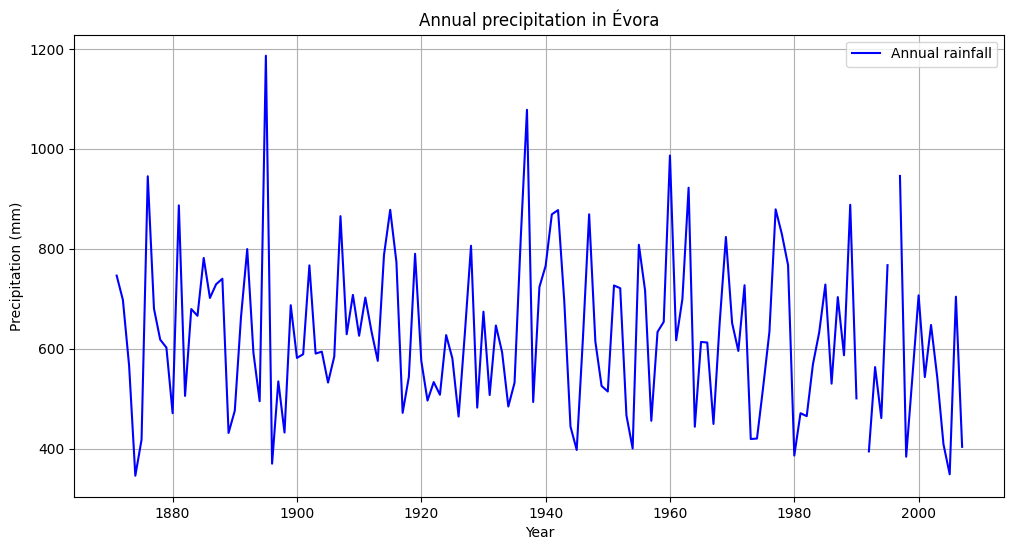

In [4]:
# Rain evolution in Évora
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(evora_rain["year"], evora_rain["Annual"], label="Annual rainfall", color="blue")

plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.title("Annual precipitation in Évora")
plt.legend()
plt.grid(True)
plt.show()

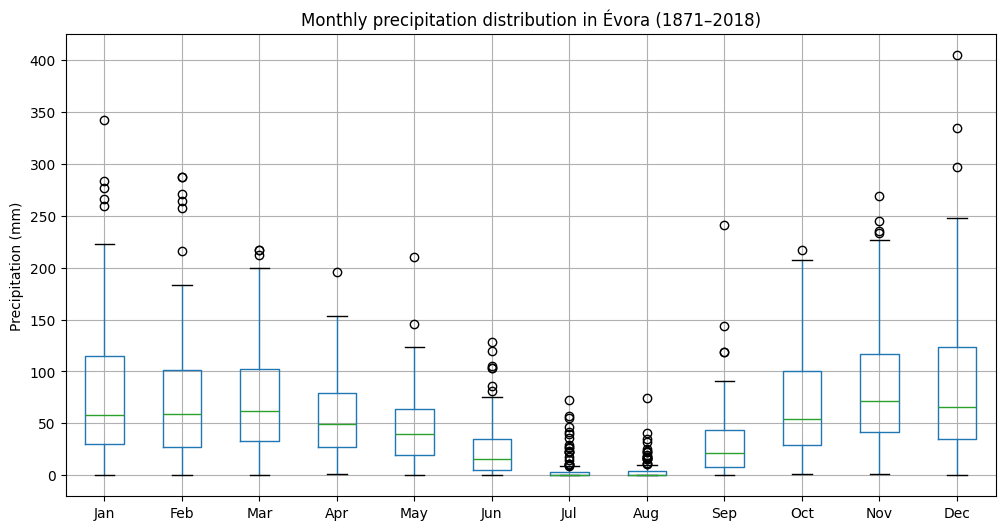

In [5]:
# Boxplot for monthly rainfall distribution

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))
evora_rain[months].boxplot()
plt.ylabel("Precipitation (mm)")
plt.title("Monthly precipitation distribution in Évora (1871–2018)")
plt.show()

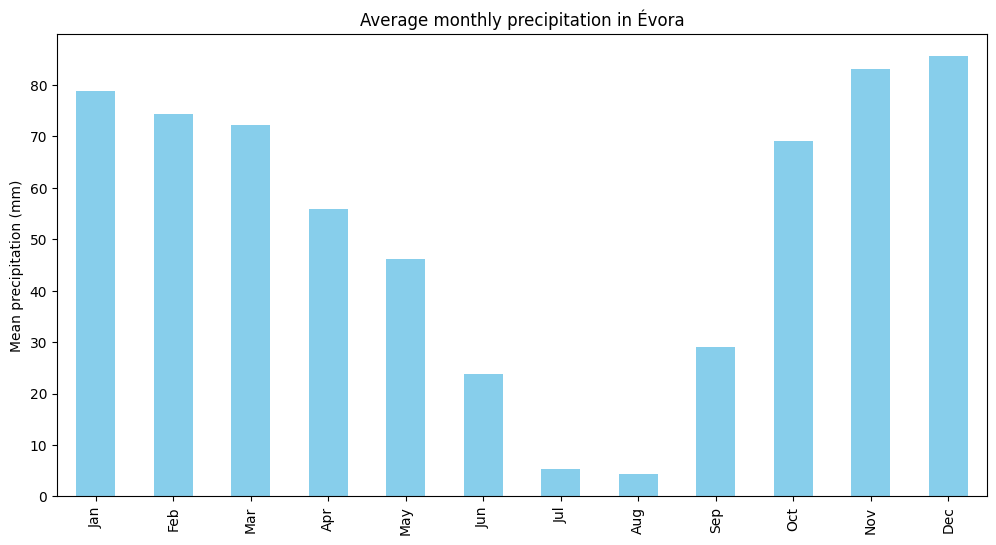

In [6]:
# Evora monthly average rain
monthly_means = evora_rain[months].mean()

plt.figure(figsize=(12,6))
monthly_means.plot(kind="bar", color="skyblue")

plt.ylabel("Mean precipitation (mm)")
plt.title("Average monthly precipitation in Évora")
plt.show()


In [7]:
evora_rain.tail()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Spring,Summer,Autumn,Annual,Winter
133,2004,45.4,64.8,25.2,25.0,23.3,0.0,0.0,8.8,15.5,161.3,19.5,20.1,73.5,8.8,196.3,408.9,161.1
134,2005,0.0,1.5,40.5,8.5,28.1,2.4,0.3,0.9,1.2,163.3,45.6,56.6,77.1,3.6,210.1,348.9,21.6
135,2006,19.9,48.8,97.7,52.6,0.0,32.0,0.4,31.7,38.1,199.8,144.2,39.0,150.3,64.1,382.1,704.2,125.3
136,2007,12.2,99.9,9.7,38.4,60.7,41.7,0.6,3.0,26.3,61.6,43.0,6.7,108.8,45.3,130.9,403.8,151.1
137,2008,55.6,63.2,5.6,142.7,NaN,2.5,0.1,0.3,9.3,NaN,NaN,NaN,NaN,2.9,NaN,NaN,125.5


In [8]:
evora_temp = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Datasets\Climate_data\temp-Evora-raw.csv")
print(evora_temp.head())
print(evora_temp.shape)

      date  tmax  tmin   tmed
0  01/1871  10.1   2.9   6.50
1  02/1871  15.5   8.4  11.95
2  03/1871  16.6   9.1  12.85
3  04/1871  22.3  12.3  17.30
4  05/1871  21.2  13.3  17.25
(1629, 4)


In [9]:
evora_temp.isna().sum()

date    0
tmax    0
tmin    0
tmed    0
dtype: int64

In [10]:
# Evora temperature data - average annual temperature evolution

evora_temp["date"] = pd.to_datetime(evora_temp["date"], format="%m/%Y")

# 
evora_temp["year"] = evora_temp["date"].dt.year

# Calcular médias anuais
df_yearly = evora_temp.groupby("year")[["tmax","tmin","tmed"]].mean().reset_index()

print(df_yearly.head())

   year       tmax       tmin       tmed
0  1871  20.375000  11.458333  15.916667
1  1872  20.500000  11.308333  15.904167
2  1873  21.150000  11.383333  16.266667
3  1874  22.683333  11.483333  17.083333
4  1875  22.408333  11.283333  16.845833


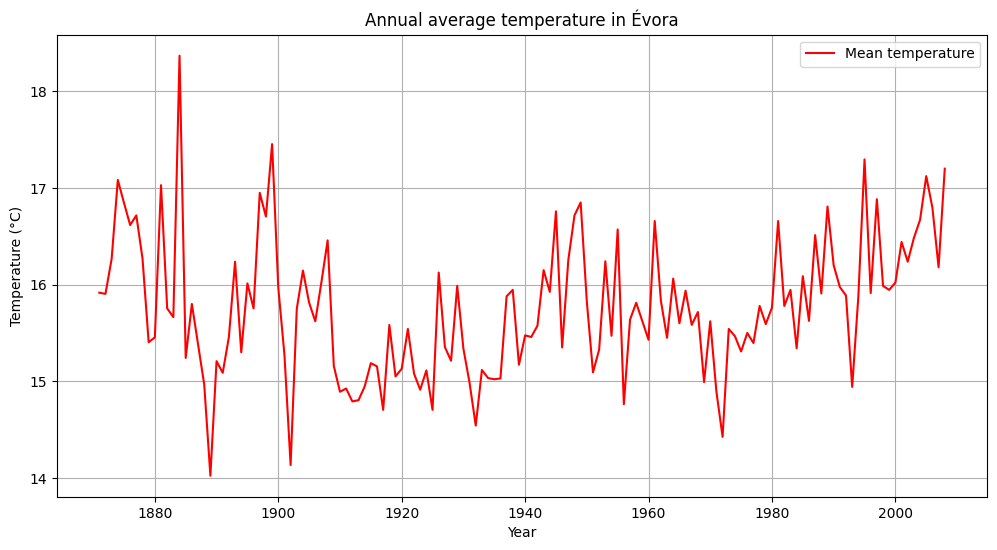

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df_yearly["year"], df_yearly["tmed"], color="red", label="Mean temperature")

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Annual average temperature in Évora")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
evora_temp.head()

,date,tmax,tmin,tmed,year
0,1871-01-01,10.1,2.9,6.50,1871
1,1871-02-01,15.5,8.4,11.95,1871
2,1871-03-01,16.6,9.1,12.85,1871
3,1871-04-01,22.3,12.3,17.30,1871
4,1871-05-01,21.2,13.3,17.25,1871


In [13]:
evora_temp.shape

(1629, 5)

In [14]:
# transform data from wide to long format

df_rain_long = evora_rain.melt(id_vars=["year"], 
                            value_vars=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
                            var_name="month", value_name="precip")

# create a date column

month_map = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,
             "Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

df_rain_long["month_num"] = df_rain_long["month"].map(month_map)
df_rain_long["date"] = pd.to_datetime({
    "year": df_rain_long["year"].astype(int),
    "month": df_rain_long["month_num"].astype(int),
    "day": 1
})

print(df_rain_long.head())

   year month  precip  month_num       date
0  1871   Jan    73.4          1 1871-01-01
1  1872   Jan   151.7          1 1872-01-01
2  1873   Jan    86.7          1 1873-01-01
3  1874   Jan    19.6          1 1874-01-01
4  1875   Jan    41.4          1 1875-01-01


In [15]:
evora_temp["date"] = pd.to_datetime(evora_temp["date"])

# garantir que a coluna year é int
evora_temp["year"] = evora_temp["date"].dt.year.astype(int)

# merge mensal (baseado na coluna date)
df_monthly = pd.merge(
    evora_temp,
    df_rain_long[["date","year","precip"]],
    on=["date","year"],
    how="inner"
)

print(df_monthly.head())

        date  tmax  tmin   tmed  year  precip
0 1871-01-01  10.1   2.9   6.50  1871    73.4
1 1871-02-01  15.5   8.4  11.95  1871    62.0
2 1871-03-01  16.6   9.1  12.85  1871    69.5
3 1871-04-01  22.3  12.3  17.30  1871    15.3
4 1871-05-01  21.2  13.3  17.25  1871    89.2


In [16]:
df_monthly.shape

(1629, 6)

Monthly averages

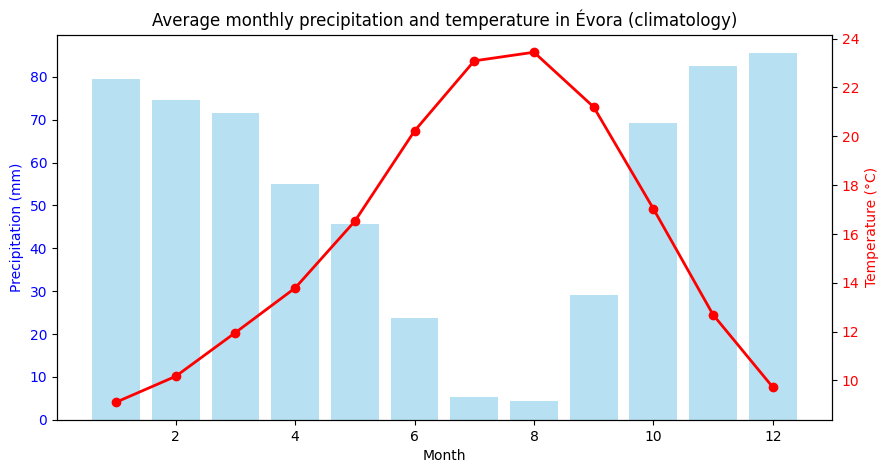

In [17]:
df_monthly["month"] = df_monthly["date"].dt.month

monthly_means = df_monthly.groupby("month")[["tmed","precip"]].mean()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(monthly_means.index, monthly_means["precip"], color="skyblue", alpha=0.6)
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.set_xlabel("Month")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(monthly_means.index, monthly_means["tmed"], color="red", marker="o", linewidth=2)
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Average monthly precipitation and temperature in Évora (climatology)")
plt.show()

Annualy averages

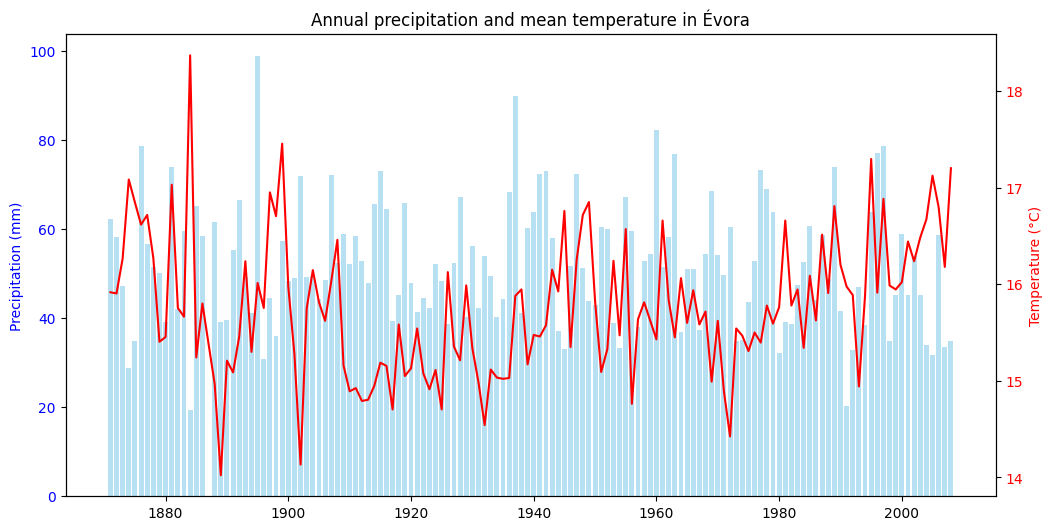

In [18]:
annual_means = df_monthly.groupby("year")[["tmed","precip"]].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(annual_means["year"], annual_means["precip"], color="skyblue", alpha=0.6)
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(annual_means["year"], annual_means["tmed"], color="red", linewidth=1.5)
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Annual precipitation and mean temperature in Évora")
plt.show()

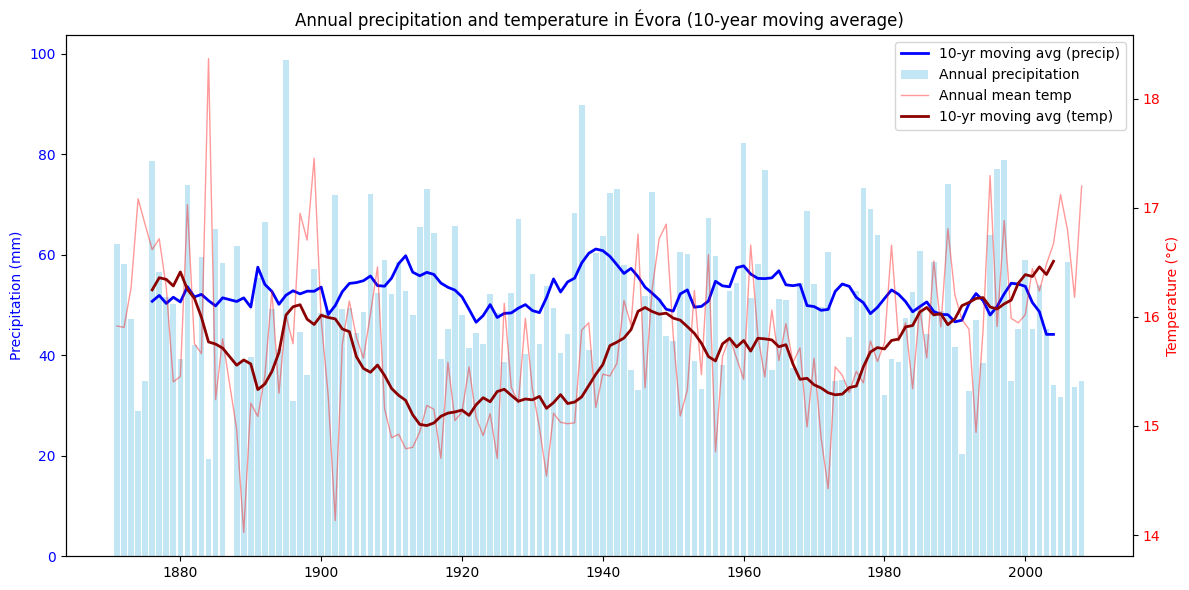

In [19]:
# calcular médias anuais
annual_means = df_monthly.groupby("year")[["tmed","precip"]].mean().reset_index()

# calcular médias móveis de 10 anos
annual_means["tmed_roll10"] = annual_means["tmed"].rolling(window=10, center=True).mean()
annual_means["precip_roll10"] = annual_means["precip"].rolling(window=10, center=True).mean()

# gráfico
fig, ax1 = plt.subplots(figsize=(12,6))

# precipitação (barras + média móvel azul escuro)
ax1.bar(annual_means["year"], annual_means["precip"], 
        color="skyblue", alpha=0.5, label="Annual precipitation")
ax1.plot(annual_means["year"], annual_means["precip_roll10"], 
         color="blue", linewidth=2, label="10-yr moving avg (precip)")
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# temperatura (linha vermelha + média móvel mais grossa)
ax2 = ax1.twinx()
ax2.plot(annual_means["year"], annual_means["tmed"], 
         color="red", alpha=0.4, linewidth=1, label="Annual mean temp")
ax2.plot(annual_means["year"], annual_means["tmed_roll10"], 
         color="darkred", linewidth=2, label="10-yr moving avg (temp)")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Annual precipitation and temperature in Évora (10-year moving average)")
fig.tight_layout()

# juntar legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

plt.show()

In [20]:
df_monthly.to_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\evora_monthly_climate.csv", index=False)

# Dados climáticos Madeira

In [21]:
madeira_rain = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Datasets\Climate_data\prec-Funchal-raw.csv") 
print(madeira_rain.head())
print(madeira_rain.shape)

   year    Jan    Feb    Mar    Apr   May   Jun  Jul  Aug   Sep   Oct    Nov  \
0  1865  104.6   95.8   45.0  113.4  37.2   0.0  2.3  4.2  31.3  50.5  128.4   
1  1866   83.6  127.9  161.7   47.6  46.4  20.7  1.2  0.0   2.3  59.4  216.4   
2  1867  216.1   10.5  158.7    0.0  22.2  28.9  0.0  0.0  13.4  44.1  358.4   
3  1868   61.2    3.1    2.1   47.5   2.4   0.0  0.1  7.8  82.8  28.3   52.9   
4  1869   74.7   23.3   46.5    0.0  23.0  47.7  0.0  0.7   0.2  82.9   79.0   

     Dec  Spring  Summer  Autumn  Annual  Winter  
0   99.7   195.6     6.5   210.2   712.4     NaN  
1   71.4   255.7    21.9   278.1   838.6   311.2  
2  354.4   180.9    28.9   415.9  1206.7   298.0  
3   43.8    52.0     7.9   164.0   332.0   418.7  
4   26.8    69.5    48.4   162.1   404.8   141.8  
(154, 18)


In [22]:
madeira_rain.isna().sum()

year      0
Jan       0
Feb       0
Mar       0
Apr       0
May       0
Jun       0
Jul       0
Aug       0
Sep       0
Oct       0
Nov       0
Dec       0
Spring    0
Summer    0
Autumn    0
Annual    0
Winter    1
dtype: int64

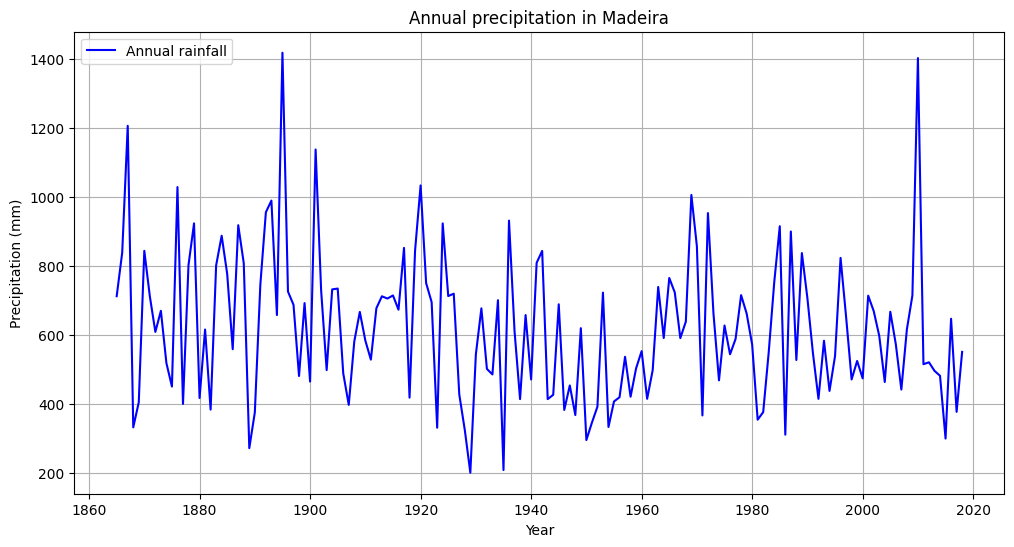

In [23]:
# Rain evolution in Madeira
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(madeira_rain["year"], madeira_rain["Annual"], label="Annual rainfall", color="blue")

plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.title("Annual precipitation in Madeira")
plt.legend()
plt.grid(True)
plt.show()

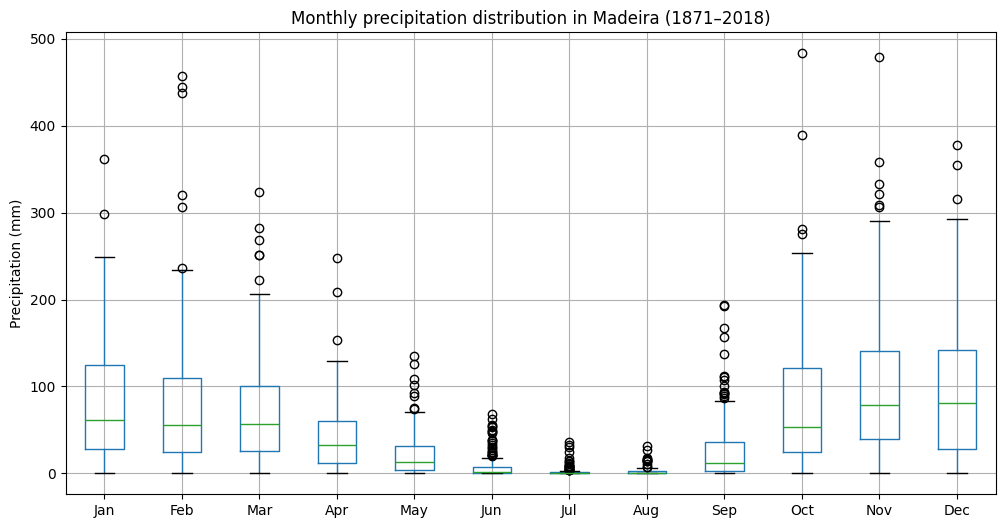

In [24]:
# Boxplot for monthly rainfall distribution

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))
madeira_rain[months].boxplot()
plt.ylabel("Precipitation (mm)")
plt.title("Monthly precipitation distribution in Madeira (1871–2018)")
plt.show()

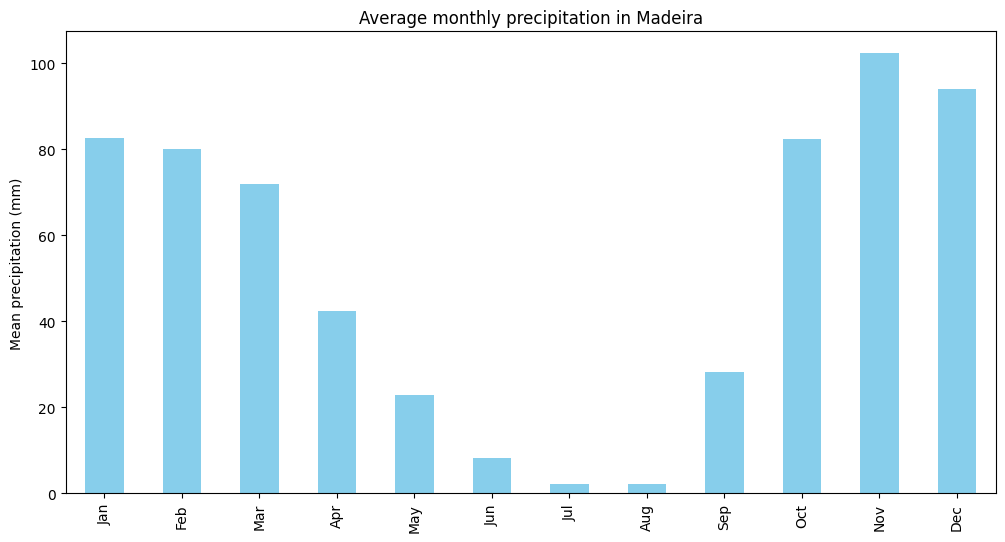

In [25]:
# Madeira's monthly average rain
monthly_means = madeira_rain[months].mean()

plt.figure(figsize=(12,6))
monthly_means.plot(kind="bar", color="skyblue")

plt.ylabel("Mean precipitation (mm)")
plt.title("Average monthly precipitation in Madeira")
plt.show()

In [26]:
madeira_temp = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Datasets\Climate_data\temp-Funchal-raw.csv")
print(madeira_temp.head())
print(madeira_temp.shape)

      date  tmax  tmin   tmed
0  01/1865  19.3  13.9  16.60
1  02/1865  20.3  13.4  16.85
2  03/1865  18.0  13.2  15.60
3  04/1865  18.7  14.8  16.75
4  05/1865  19.4  15.6  17.50
(1848, 4)


In [27]:
madeira_temp.isna().sum()

date    0
tmax    0
tmin    0
tmed    0
dtype: int64

In [28]:
# Madeira's temperature data - average annual temperature evolution

madeira_temp["date"] = pd.to_datetime(madeira_temp["date"], format="%m/%Y")

# 
madeira_temp["year"] = madeira_temp["date"].dt.year

# Calcular médias anuais
df_yearly_madeira = madeira_temp.groupby("year")[["tmax","tmin","tmed"]].mean().reset_index()

print(df_yearly_madeira.head())

   year       tmax       tmin       tmed
0  1865  21.133333  16.633333  18.883333
1  1866  20.800000  16.633333  18.716667
2  1867  21.350000  16.758333  19.054167
3  1868  21.575000  16.516667  19.045833
4  1869  21.183333  16.158333  18.670833


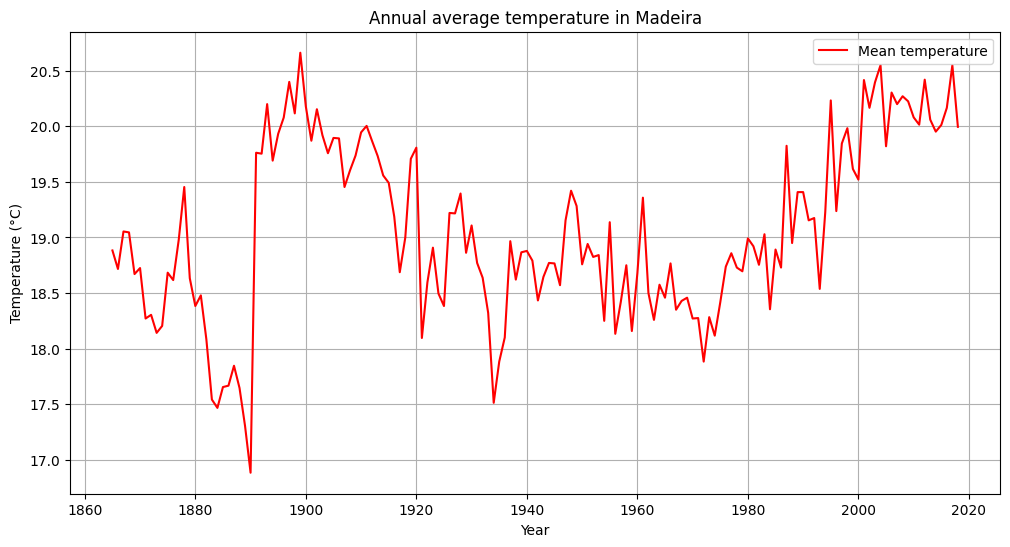

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df_yearly_madeira["year"], df_yearly_madeira["tmed"], color="red", label="Mean temperature")

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Annual average temperature in Madeira")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# transform data from wide to long format

df_rain_long_madeira = madeira_rain.melt(id_vars=["year"], 
                            value_vars=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
                            var_name="month", value_name="precip")

# create a date column

month_map = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,
             "Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

df_rain_long_madeira["month_num"] = df_rain_long_madeira["month"].map(month_map)
df_rain_long_madeira["date"] = pd.to_datetime({
    "year": df_rain_long_madeira["year"].astype(int),
    "month": df_rain_long_madeira["month_num"].astype(int),
    "day": 1
})

print(df_rain_long_madeira.head())

   year month  precip  month_num       date
0  1865   Jan   104.6          1 1865-01-01
1  1866   Jan    83.6          1 1866-01-01
2  1867   Jan   216.1          1 1867-01-01
3  1868   Jan    61.2          1 1868-01-01
4  1869   Jan    74.7          1 1869-01-01


In [31]:
madeira_temp["date"] = pd.to_datetime(madeira_temp["date"])

# garantir que a coluna year é int
madeira_temp["year"] = madeira_temp["date"].dt.year.astype(int)

# merge mensal (baseado na coluna date)
df_monthly_madeira = pd.merge(
    madeira_temp,
    df_rain_long_madeira[["date","year","precip"]],
    on=["date","year"],
    how="inner"
)

print(df_monthly_madeira.head())

        date  tmax  tmin   tmed  year  precip
0 1865-01-01  19.3  13.9  16.60  1865   104.6
1 1865-02-01  20.3  13.4  16.85  1865    95.8
2 1865-03-01  18.0  13.2  15.60  1865    45.0
3 1865-04-01  18.7  14.8  16.75  1865   113.4
4 1865-05-01  19.4  15.6  17.50  1865    37.2


In [32]:
df_monthly_madeira.shape

(1848, 6)

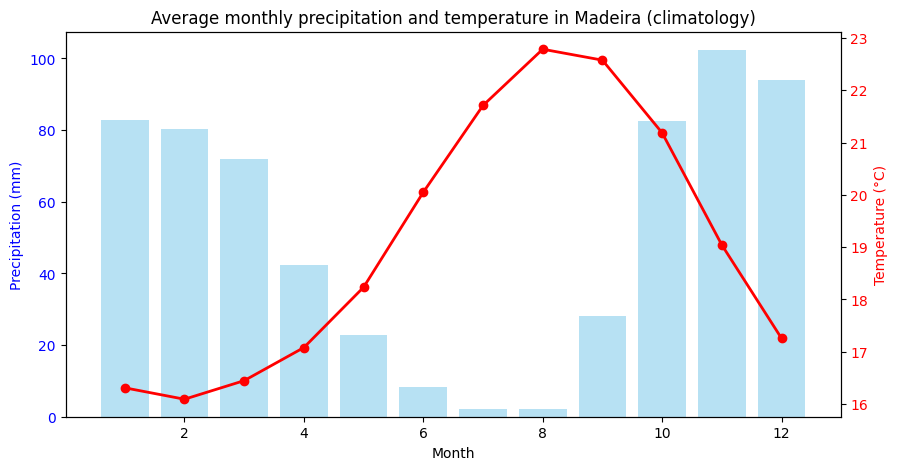

In [33]:
df_monthly_madeira["month"] = df_monthly_madeira["date"].dt.month

monthly_means = df_monthly_madeira.groupby("month")[["tmed","precip"]].mean()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(monthly_means.index, monthly_means["precip"], color="skyblue", alpha=0.6)
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.set_xlabel("Month")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(monthly_means.index, monthly_means["tmed"], color="red", marker="o", linewidth=2)
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Average monthly precipitation and temperature in Madeira (climatology)")
plt.show()

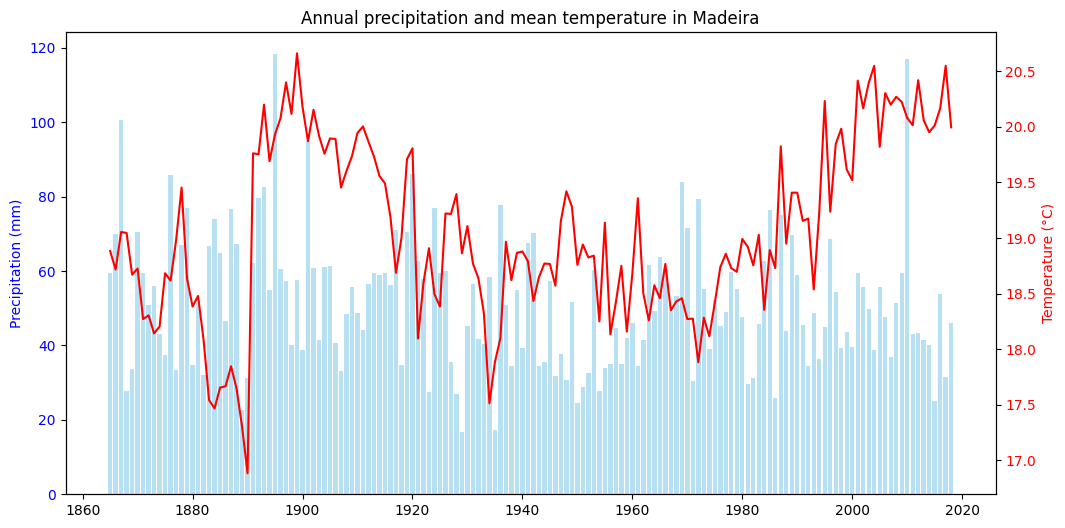

In [34]:
annual_means = df_monthly_madeira.groupby("year")[["tmed","precip"]].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(annual_means["year"], annual_means["precip"], color="skyblue", alpha=0.6)
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(annual_means["year"], annual_means["tmed"], color="red", linewidth=1.5)
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Annual precipitation and mean temperature in Madeira")
plt.show()

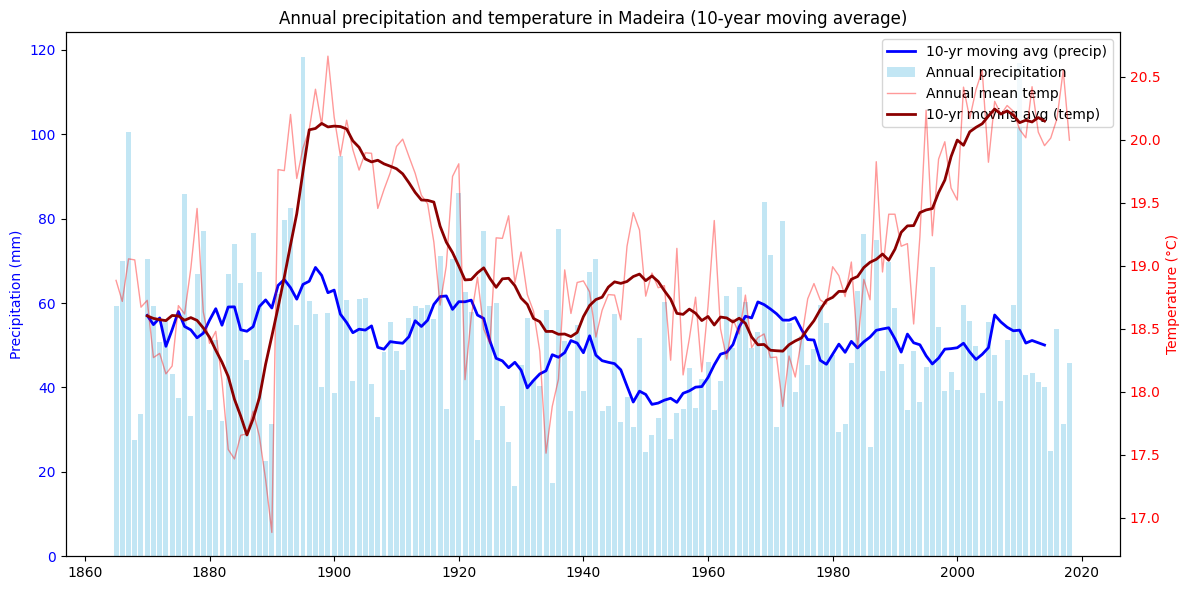

In [35]:
# calcular médias anuais
annual_means = df_monthly_madeira.groupby("year")[["tmed","precip"]].mean().reset_index()

# calcular médias móveis de 10 anos
annual_means["tmed_roll10"] = annual_means["tmed"].rolling(window=10, center=True).mean()
annual_means["precip_roll10"] = annual_means["precip"].rolling(window=10, center=True).mean()

# gráfico
fig, ax1 = plt.subplots(figsize=(12,6))

# precipitação (barras + média móvel azul escuro)
ax1.bar(annual_means["year"], annual_means["precip"], 
        color="skyblue", alpha=0.5, label="Annual precipitation")
ax1.plot(annual_means["year"], annual_means["precip_roll10"], 
         color="blue", linewidth=2, label="10-yr moving avg (precip)")
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# temperatura (linha vermelha + média móvel mais grossa)
ax2 = ax1.twinx()
ax2.plot(annual_means["year"], annual_means["tmed"], 
         color="red", alpha=0.4, linewidth=1, label="Annual mean temp")
ax2.plot(annual_means["year"], annual_means["tmed_roll10"], 
         color="darkred", linewidth=2, label="10-yr moving avg (temp)")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Annual precipitation and temperature in Madeira (10-year moving average)")
fig.tight_layout()

# juntar legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

plt.show()

In [36]:
df_monthly_madeira.to_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\madeira_monthly_climate.csv", index=False)

In [37]:
import unidecode

df_clima_2024 = pd.read_excel(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Datasets\Climate_data\outros_dados_meteorologicos.xlsx")

df_clima_2024.head()

,mês,rumo_predominante_ vento,velocidade_médi_Vento(km/h),maior _valor_velocidade_máxima_instantânea_vento_rajada(km/h),humidade_relativa_média,número_horas_de_sol
0,Janeiro,NE,6.5,65,68,142.3
1,Fevereiro,E,6.7,59,64,189.3
2,Março,W,7.2,68,63,208.1
3,Abril,SW,5.5,49,61,253.1
4,Maio,SW,4.8,45,65,186.6


In [38]:
clima_madeira_2024 = {
    "humidade_media": df_clima_2024["humidade_relativa_média"].mean(),
    "horas_sol_ano": df_clima_2024["número_horas_de_sol"].sum(),   # total anual
    "horas_sol_media": df_clima_2024["número_horas_de_sol"].mean() / 30,  # ~ h/dia
    "vento_medio": df_clima_2024["velocidade_médi_Vento(km/h)"].mean(),
}
print(clima_madeira_2024)

{'humidade_media': np.float64(65.58333333333333), 'horas_sol_ano': np.float64(2294.7000000000003), 'horas_sol_media': np.float64(6.374166666666667), 'vento_medio': np.float64(5.741666666666667)}


In [39]:
clima_madeira_2024

{'humidade_media': np.float64(65.58333333333333),
 'horas_sol_ano': np.float64(2294.7000000000003),
 'horas_sol_media': np.float64(6.374166666666667),
 'vento_medio': np.float64(5.741666666666667)}

In [40]:
print(annual_means)

     year       tmed      precip  tmed_roll10  precip_roll10
0    1865  18.883333   59.366667          NaN            NaN
1    1866  18.716667   69.883333          NaN            NaN
2    1867  19.054167  100.558333          NaN            NaN
3    1868  19.045833   27.666667          NaN            NaN
4    1869  18.670833   33.733333          NaN            NaN
..    ...        ...         ...          ...            ...
149  2014  19.952500   40.133333    20.147833      50.046667
150  2015  20.012500   24.958333          NaN            NaN
151  2016  20.166667   53.925000          NaN            NaN
152  2017  20.550000   31.416667          NaN            NaN
153  2018  19.995833   45.908333          NaN            NaN

[154 rows x 5 columns]


In [41]:
print(monthly_means)

            tmed      precip
month                       
1      16.310260   82.723377
2      16.092013   80.179870
3      16.447338   72.048701
4      17.080065   42.447403
5      18.233182   22.822727
6      20.049805    8.337013
7      21.708506    2.079870
8      22.783961    2.216234
9      22.575065   28.144156
10     21.185065   82.472727
11     19.041494  102.331169
12     17.256169   94.035065


In [42]:
clima_madeira = {
    "temperatura_media": annual_means["tmed"].mean(),
    "precipitacao_media": annual_means["precip"].mean(),
}

print(clima_madeira)

{'temperatura_media': np.float64(19.06357683982684), 'precipitacao_media': np.float64(51.65319264069264)}


In [43]:
#transformar em dataframe

clima_madeira = pd.DataFrame([clima_madeira])

In [44]:
clima_madeira

,temperatura_media,precipitacao_media
0,19.063577,51.653193
